In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

In [2]:
plt.rc('font', family='NanumBarunGothic') 

## 사전 검사 결과 데이터프레임 불러오기

In [3]:
df = pd.read_csv('./DATA/insu_pre_review.csv', engine = 'python', encoding ='EUC-KR')
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['bmi'] = (df['weight']/(df['height']/100)**2).round(2)
df['whtr'] = (df['waist']/df['height']).round(2)
df_gender1 = df[df['gender'] == 1]
df_gender1['rfm'] = round(64-(((df["height"]/100)/(df["waist"]/100)))*20,1)
df_gender2 = df[df['gender'] == 2]
df_gender2['rfm'] = round(76-(((df["height"]/100)/(df["waist"]/100)))*20,1)
df_gender = pd.merge(df_gender1, df_gender2, how='outer')
df = df_gender

#  이상치 확인 및 결측치 제거 (필요한 변수만 추출) , 혈액검사 데이터만 추출

In [5]:
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.14,0.53,26.5
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.67,0.52,25.3
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.16,0.52,25.6
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.51,0.56,28.1
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.56,0.53,38.5
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.31,0.40,26.3
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.47,0.46,32.4
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.89,0.56,40.3


In [6]:
# 혈액검사만 추출
df =df[df['review_cat'] =='혈액검사']

In [7]:
df.isna().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    1
waist                   1
bp_min                  0
bp_max                  0
pulse_count             2
bt_chol                 0
bt_crea              6030
bt_gluc                 0
bt_hb                3860
bt_hbsa                 0
bt_hct               3860
bt_mch               3860
bt_mchc              3860
bt_mvc               3860
bt_plat              3860
bt_rbc               3860
bt_wbc               3860
bt_rgpt              4769
bt_sgot              4514
bt_sgpt                 0
bt_trig              5065
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge           0
bt_crea_judge           0
bt_gluc_judge           0
bt_hb_judge             0
bt_hbsa_judge           0
bt_hct_judge            0
bt_mch_judge

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11781 entries, 0 to 14937
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        11781 non-null  object 
 1   review_cat         11781 non-null  object 
 2   judge              11781 non-null  object 
 3   review_date        11781 non-null  object 
 4   gender             11781 non-null  int64  
 5   age                11781 non-null  int64  
 6   height             11781 non-null  int64  
 7   weight             11781 non-null  int64  
 8   bust               11780 non-null  float64
 9   waist              11780 non-null  float64
 10  bp_min             11781 non-null  int64  
 11  bp_max             11781 non-null  int64  
 12  pulse_count        11779 non-null  float64
 13  bt_chol            11781 non-null  float64
 14  bt_crea            5751 non-null   float64
 15  bt_gluc            11781 non-null  float64
 16  bt_hb              792

## health_risk 도출 (z 검정)

In [9]:
def new_hist(data,var):
    plt.hist(data[data[str(var)+"_judge"]==1][var],label = '비정상', alpha = 0.5)
    plt.hist(data[data[str(var)+"_judge"]==0][var],label = '정상', alpha = 0.5)
    plt.legend()
def new_crosstab(data,var) : 
    print(pd.crosstab(index = data[str(var)+"_judge"], columns = data[var]))
    print()
    print(pd.crosstab(index = data[str(var)+"_judge"], columns = data[var],normalize = 'columns').round(3))

In [10]:

def my_t(data,var):
    k = stats.levene(data[data["'"+str(var)+'_judge']==0][var],data[data["'"+str(var)+'_judge']==1][var])
    t_result = stats.ttest_ind(data[data["'"+str(var)+'_judge']==0][[var]],
                               data[data["'"+str(var)+'_judge']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

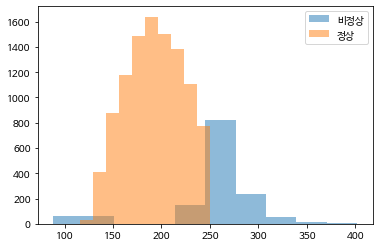

In [11]:
new_hist(df,'bt_chol')

<AxesSubplot:>

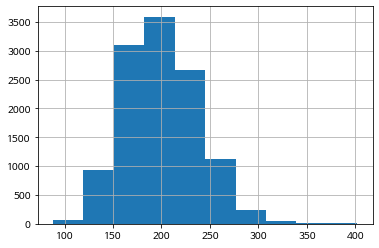

In [12]:
df['bt_chol'].hist()

In [13]:
df['bt_chol'].describe()

count    11781.000000
mean       199.928614
std         37.709524
min         88.000000
25%        172.000000
50%        198.000000
75%        225.000000
max        402.000000
Name: bt_chol, dtype: float64

In [14]:
df.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.14,0.53,26.5
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.51,0.56,28.1
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,27.5
5,C112361,혈액검사,승인,2015-06-28,1,70,169,70,98.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.51,0.53,26.4
6,C112363,혈액검사,재검,2014-12-22,1,69,164,67,98.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.91,0.53,26.3


In [15]:
def z_score(data):
    z_value_column_list = ['bt_chol_z_value','bt_crea_z_value','bt_gluc_z_value','bt_hb_z_value','bt_hct_z_value','bt_mch_z_value','bt_mchc_z_value','bt_mvc_z_value','bt_plat_z_value','bt_rbc_z_value','bt_wbc_z_value','bt_rgpt_z_value','bt_sgot_z_value','bt_sgpt_z_value','bt_trig_z_value']
    blood_test_column_list = ['bt_chol','bt_crea','bt_gluc','bt_hb','bt_hct','bt_mch','bt_mchc','bt_mvc','bt_plat','bt_rbc','bt_wbc','bt_rgpt','bt_sgot','bt_sgpt','bt_trig']

    for i in range(len(z_value_column_list)):
        z_value_column = z_value_column_list[i]
        blood_test_column = blood_test_column_list[i]

        data[z_value_column] = (data[blood_test_column]-data[blood_test_column].mean())/data[blood_test_column].std()


    data['z_count'] = data[z_value_column_list].notnull().sum(1)

    data.fillna({x:0 for x in z_value_column_list}, inplace = True)

    data['z_score'] = (data[z_value_column_list].sum(axis = 1))/data['z_count']

    data.head(5)

In [16]:
z_score(df)

<AxesSubplot:>

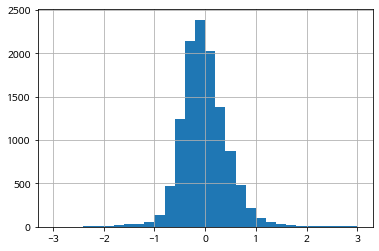

In [17]:
df['z_score'].hist(range = (-3,3), bins = 30)

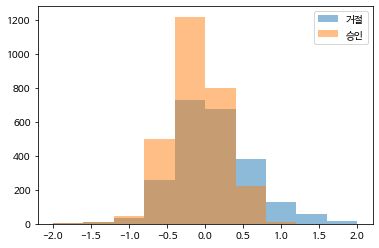

In [18]:
plt.hist(df[df['judge'] == '거절']['z_score'], label = '거절', alpha = 0.5, range = (-2,2))
plt.hist(df[df['judge'] == '승인']['z_score'], label = '승인', alpha = 0.5, range = (-2,2))

plt.legend()

In [19]:
df['z_score'].describe()

count    11781.000000
mean        -0.010754
std          0.514651
min         -2.998204
25%         -0.305187
50%         -0.057227
75%          0.230867
max          8.852249
Name: z_score, dtype: float64

In [20]:
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.000000,0.000000,0.000000,0.000000,0.529729,-0.192805,-0.239122,0.000000,5,-0.403957
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.000000,0.000000,0.000000,0.000000,0.385086,0.064639,0.258122,-0.618023,7,-0.112168
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.000000,0.000000,0.000000,0.000000,-0.229647,0.682507,1.128299,0.000000,5,0.255631
5,C112361,혈액검사,승인,2015-06-28,1,70,169,70,98.0,90.0,...,0.916789,-0.869884,1.535180,0.883009,-0.109112,-0.192805,0.175248,0.179943,15,0.620956
6,C112363,혈액검사,재검,2014-12-22,1,69,164,67,98.0,87.0,...,0.000000,0.000000,0.000000,0.000000,-0.121165,-0.089828,0.175248,0.000000,5,-0.002611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,C134238,혈액검사,재검,2015-05-18,2,50,158,70,100.0,80.0,...,0.289999,0.743794,0.515012,-0.085377,0.000000,0.000000,-0.404870,0.512428,13,0.144607
14932,C134241,혈액검사,승인,2015-09-28,2,27,159,48,82.0,68.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.612054,0.096821,5,-0.150139
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,-0.754652,0.915461,0.490722,2.819780,0.000000,0.000000,-0.404870,0.000000,11,0.229256
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,...,1.334650,-1.968558,-0.310838,-1.376557,0.000000,0.000000,0.423870,-0.493341,13,-0.086267


 고위험군(거절) 분류 기준 설정

In [21]:
a = df[df['z_score'] >= 0.75]

저위험군(할증) 분류 기준 선정

In [22]:
df[(df['z_score'] <= 0.25) & (df['z_score'] >= -0.25)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.000000,0.000000,0.000000,0.000000,0.385086,0.064639,0.258122,-0.618023,7,-0.112168
6,C112363,혈액검사,재검,2014-12-22,1,69,164,67,98.0,87.0,...,0.000000,0.000000,0.000000,0.000000,-0.121165,-0.089828,0.175248,0.000000,5,-0.002611
11,C112372,혈액검사,재검,2015-03-03,1,70,171,73,96.0,84.0,...,0.000000,0.000000,0.000000,0.000000,-0.217594,0.836973,1.294046,0.000000,5,0.134937
12,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,...,0.000000,0.000000,0.000000,0.000000,-0.048844,-0.295783,0.216685,0.000000,5,0.092593
20,C112386,혈액검사,재검,2015-07-19,1,69,170,70,102.0,86.0,...,1.334650,-0.938551,-0.067941,-0.860085,-0.241701,-0.244294,-0.239122,-0.642960,15,0.174068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,C134237,혈액검사,거절,2014-10-30,2,53,158,62,90.0,80.0,...,-0.336791,0.366124,-0.456577,1.722276,0.000000,0.000000,-0.321996,0.000000,11,-0.094552
14930,C134238,혈액검사,재검,2015-05-18,2,50,158,70,100.0,80.0,...,0.289999,0.743794,0.515012,-0.085377,0.000000,0.000000,-0.404870,0.512428,13,0.144607
14932,C134241,혈액검사,승인,2015-09-28,2,27,159,48,82.0,68.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.612054,0.096821,5,-0.150139
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,-0.754652,0.915461,0.490722,2.819780,0.000000,0.000000,-0.404870,0.000000,11,0.229256


## 거절 고객 위험군 중 저위험군(할증), 고위험군(거절) 분류

In [23]:
df1 = pd.read_csv('reject_risk.csv', engine = 'python', encoding ='EUC-KR')
df1

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,risk
0,0,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,27.5,1
1,1,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,22.3,1
2,2,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,...,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,26.2,1
3,3,C112431,혈액검사,거절,2015-04-14,1,68,165,70,97.0,...,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,26.9,1
4,4,C112478,혈액검사,거절,2015-09-29,1,68,173,65,93.0,...,0.0,0.0,1.0,0.0,0.0,1.0,21.72,0.49,22.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2099,C134142,혈액검사,거절,2015-09-02,2,37,153,52,86.0,...,0.0,0.0,0.0,0.0,0.0,1.0,22.21,0.52,37.3,1
2100,2100,C134149,혈액검사,거절,2015-03-10,2,52,160,62,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.22,0.47,33.3,1
2101,2101,C134162,혈액검사,거절,2014-11-09,2,47,152,50,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,36.5,1
2102,2102,C134163,혈액검사,거절,2015-08-28,2,48,155,58,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.14,0.48,34.7,1


In [24]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)
df1.drop(['customer_id', 'review_date'], axis =1, inplace = True)

In [25]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,...,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,27.5,1
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,...,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,22.3,1
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,...,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,26.2,1
3,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,...,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,26.9,1
4,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,...,0.0,0.0,1.0,0.0,0.0,1.0,21.72,0.49,22.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,혈액검사,거절,2,37,153,52,86.0,79.0,70,120,...,0.0,0.0,0.0,0.0,0.0,1.0,22.21,0.52,37.3,1
2100,혈액검사,거절,2,52,160,62,90.0,75.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,24.22,0.47,33.3,1
2101,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,...,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,36.5,1
2102,혈액검사,거절,2,48,155,58,90.0,75.0,70,110,...,0.0,0.0,0.0,0.0,0.0,0.0,24.14,0.48,34.7,1


In [26]:
z_score(df1)

In [27]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,...,0.000000,0.000000,0.000000,0.000000,-0.287791,0.305272,0.560956,0.000000,5,0.044781
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,...,0.000000,0.000000,0.000000,0.000000,-0.189727,-0.397072,-0.012906,0.000000,5,0.004866
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,...,0.000000,0.000000,0.000000,0.000000,-0.333554,-0.507968,-0.378091,0.284501,6,-0.047831
3,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,...,0.286628,-0.187825,0.416480,1.239723,0.444416,1.857820,2.386880,-0.202440,15,0.626325
4,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,...,0.286628,-1.157409,0.164149,0.187451,-0.078589,-0.175279,-0.456345,-0.792256,15,-0.217357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,혈액검사,거절,2,37,153,52,86.0,79.0,70,120,...,0.794426,-0.405146,-0.340513,1.792312,0.000000,0.000000,-0.091160,0.442243,13,0.251678
2100,혈액검사,거절,2,52,160,62,90.0,75.0,80,120,...,-0.689907,0.330401,-0.432270,0.534289,0.000000,0.000000,-0.534598,0.000000,11,-0.279072
2101,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,...,1.067856,-0.405146,-1.808623,0.064000,0.000000,0.000000,-0.299837,0.000000,11,-0.374329
2102,혈액검사,거절,2,48,155,58,90.0,75.0,70,110,...,0.677242,0.179948,-0.891054,-0.817791,-0.418542,-0.507968,-0.508514,-0.764823,15,-0.538920


In [28]:
df1[df1['z_score'] >= 0.75]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
8,혈액검사,거절,1,67,175,80,99.0,91.0,85,135,...,0.000000,0.000000,0.000000,0.000000,-0.045901,0.748857,0.795717,1.676741,6,1.281928
14,혈액검사,거절,1,64,165,69,95.0,86.0,80,120,...,0.000000,0.000000,0.000000,0.000000,-0.333554,-0.101348,-0.378091,6.909644,6,1.543232
28,혈액검사,거절,1,62,168,68,94.0,87.0,70,125,...,0.000000,0.000000,0.000000,0.000000,2.425298,3.373403,-0.012906,4.708121,7,1.483040
34,혈액검사,거절,1,61,168,75,100.0,95.0,75,115,...,0.872549,-1.742503,1.838711,-1.346866,0.326740,0.711892,0.404448,2.074524,15,0.892490
43,혈액검사,거절,1,60,168,70,101.0,82.0,85,135,...,0.000000,0.000000,0.000000,0.000000,0.359428,1.155477,1.943441,0.000000,5,0.936290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,혈액검사,거절,2,50,147,50,88.0,74.0,70,110,...,1.263163,0.564438,-0.546966,-0.229930,0.000000,0.000000,0.065348,-0.168148,12,0.799674
1831,혈액검사,거절,2,31,167,55,85.0,78.0,70,100,...,0.000000,0.000000,0.000000,0.000000,-0.379317,5.295605,7.212535,-0.305315,7,1.472288
1847,혈액검사,거절,2,28,161,70,102.0,85.0,70,110,...,0.000000,0.000000,0.000000,0.000000,-0.274716,-0.027417,0.013179,12.746079,7,2.485359
2004,혈액검사,거절,2,25,170,58,85.0,71.0,70,110,...,-0.299293,0.196665,0.485298,0.357931,0.012937,13.945517,19.185379,0.000000,13,2.255757


In [29]:
df1[(df1['z_score'] <= 0.25) & (df1['z_score'] >= -0.25)]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,...,0.000000,0.000000,0.000000,0.000000,-0.287791,0.305272,0.560956,0.000000,5,0.044781
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,...,0.000000,0.000000,0.000000,0.000000,-0.189727,-0.397072,-0.012906,0.000000,5,0.004866
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,...,0.000000,0.000000,0.000000,0.000000,-0.333554,-0.507968,-0.378091,0.284501,6,-0.047831
4,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,...,0.286628,-1.157409,0.164149,0.187451,-0.078589,-0.175279,-0.456345,-0.792256,15,-0.217357
5,혈액검사,거절,1,66,172,71,101.0,85.0,80,120,...,0.000000,0.000000,0.000000,0.000000,-0.300866,0.231341,0.065348,-0.696239,6,-0.019012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,혈액검사,거절,2,45,155,38,72.0,58.0,55,90,...,-0.650845,0.146514,1.196414,-0.994149,0.000000,0.000000,-0.560683,-0.277881,13,-0.160847
2091,혈액검사,거절,2,45,153,74,110.0,100.0,100,150,...,0.481935,0.246816,-0.409331,0.357931,0.000000,0.000000,-0.012906,0.000000,11,0.190010
2096,혈액검사,거절,2,48,157,54,91.0,70.0,70,115,...,0.677242,-0.003938,-0.294635,0.005214,-0.425080,0.009548,0.065348,0.000000,13,0.090034
2097,혈액검사,거절,2,46,159,59,90.0,74.0,80,130,...,-0.103986,0.614589,-2.267407,-0.053572,0.000000,0.000000,-0.404175,0.000000,11,-0.191107


In [30]:
df1['health_risk'] = -1

In [31]:
df1.loc[df1['z_score'] >= 0.75, 'health_risk'] = 1
df1.loc[(df1['z_score'] <= 0.25) & (df1['z_score'] >= -0.25), 'health_risk'] = 0

In [32]:
df1['health_risk'].value_counts()

-1    1028
 0     977
 1      99
Name: health_risk, dtype: int64

In [33]:
df1_risk = df1[df1['health_risk'] != -1]

In [34]:
df1_risk.groupby('health_risk').count()

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
health_risk,,,,,,,,,,,,,,,,,,,,,
0,977,977,977,977,977,977,977,977,977,977,...,977,977,977,977,977,977,977,977,977,977
1,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99


In [35]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score,health_risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,...,0.000000,0.000000,0.000000,-0.287791,0.305272,0.560956,0.000000,5,0.044781,0
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,...,0.000000,0.000000,0.000000,-0.189727,-0.397072,-0.012906,0.000000,5,0.004866,0
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,...,0.000000,0.000000,0.000000,-0.333554,-0.507968,-0.378091,0.284501,6,-0.047831,0
3,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,...,-0.187825,0.416480,1.239723,0.444416,1.857820,2.386880,-0.202440,15,0.626325,-1
4,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,...,-1.157409,0.164149,0.187451,-0.078589,-0.175279,-0.456345,-0.792256,15,-0.217357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,혈액검사,거절,2,37,153,52,86.0,79.0,70,120,...,-0.405146,-0.340513,1.792312,0.000000,0.000000,-0.091160,0.442243,13,0.251678,-1
2100,혈액검사,거절,2,52,160,62,90.0,75.0,80,120,...,0.330401,-0.432270,0.534289,0.000000,0.000000,-0.534598,0.000000,11,-0.279072,-1
2101,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,...,-0.405146,-1.808623,0.064000,0.000000,0.000000,-0.299837,0.000000,11,-0.374329,-1
2102,혈액검사,거절,2,48,155,58,90.0,75.0,70,110,...,0.179948,-0.891054,-0.817791,-0.418542,-0.507968,-0.508514,-0.764823,15,-0.538920,-1


In [36]:
df1_risk

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score,health_risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,...,0.000000,0.000000,0.000000,-0.287791,0.305272,0.560956,0.000000,5,0.044781,0
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,...,0.000000,0.000000,0.000000,-0.189727,-0.397072,-0.012906,0.000000,5,0.004866,0
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,...,0.000000,0.000000,0.000000,-0.333554,-0.507968,-0.378091,0.284501,6,-0.047831,0
4,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,...,-1.157409,0.164149,0.187451,-0.078589,-0.175279,-0.456345,-0.792256,15,-0.217357,0
5,혈액검사,거절,1,66,172,71,101.0,85.0,80,120,...,0.000000,0.000000,0.000000,-0.300866,0.231341,0.065348,-0.696239,6,-0.019012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,혈액검사,거절,2,45,155,38,72.0,58.0,55,90,...,0.146514,1.196414,-0.994149,0.000000,0.000000,-0.560683,-0.277881,13,-0.160847,0
2091,혈액검사,거절,2,45,153,74,110.0,100.0,100,150,...,0.246816,-0.409331,0.357931,0.000000,0.000000,-0.012906,0.000000,11,0.190010,0
2096,혈액검사,거절,2,48,157,54,91.0,70.0,70,115,...,-0.003938,-0.294635,0.005214,-0.425080,0.009548,0.065348,0.000000,13,0.090034,0
2097,혈액검사,거절,2,46,159,59,90.0,74.0,80,130,...,0.614589,-2.267407,-0.053572,0.000000,0.000000,-0.404175,0.000000,11,-0.191107,0


In [37]:
df1_risk.to_csv('거절저위험군.csv',encoding = 'euckr')